In [46]:
#importing libraries
import random
from IPython.display import clear_output, display
import time
import chess
import numpy as np

In [29]:
#Defining the Node
class Node:
    def __init__(self, move, value, parent=None):
        self.move = move
        self.value = value
        self.parent = parent
        self.children = list()
    

In [30]:
#Defining constants
pawn_value = 100
knight_value = 300
bishop_value = 300
rook_value = 500
queen_value = 900

In [39]:
def cal_material(observation, turn):
    total = 0
    
    #number of pawns
    total += len(observation.pieces(chess.PAWN, turn)) * pawn_value
    #number of white knights
    total += len(observation.pieces(chess.KNIGHT, turn)) * knight_value
    #number of bishops
    total += len(observation.pieces(chess.BISHOP, turn)) * bishop_value
    #number of rooks 
    total += len(observation.pieces(chess.ROOK, turn)) * rook_value
    #number of queens
    total += len(observation.pieces(chess.QUEEN, turn)) * queen_value
    
    return total


#function to evaluate the board
def evaluate_board(observation):
    #get sum of both sides points
    white_eval = cal_material(observation, chess.WHITE)
    black_eval = cal_material(observation, chess.BLACK)
    
    #Negative board value means black is leading, positive means white
    evaluation = white_eval - black_eval
    
    #if it is black's turn flip the sign so that better is positive instead of negative
    perspective = 1
    if not observation.turn: 
        perspective *= -1 
    
    return evaluation*perspective

    #end result will be:
        #if it is white's turn, positive is better negative is better
        #if it is black's turn, positive is better and negative is better
    
#Search Function
def search(observation, depth, alpha, beta):
    
    if depth == 0:
        return search_all_captures(observation, alpha, beta)
    if observation.is_checkmate():
        return -1e9
    if observation.is_stalemate():
        return 0
    
    moves = observation.legal_moves
    
    best_eval = -1e9
    
    for x in moves:
        observation.push(x)
        evaluation = -search(observation, depth-1, -beta, -alpha)
        observation.pop()
        if evaluation >= beta:
            return beta
        alpha = max(alpha, evaluation)
        
    return alpha

def search_all_captures(observation, alpha, beta):
        evaluation = evaluate_board(observation)

        if evaluation >= beta:
            return beta
        alpha = max(alpha, evaluation)

        capture_moves = [x for x in observation.legal_moves if observation.is_capture(x)]

        for move in capture_moves: 

            observation.push(move)
            evaluation = -search_all_captures(observation, -beta, -alpha)
            observation.pop()

            if evaluation >= beta:
                return beta
            alpha = max(alpha, evaluation)

        return alpha

In [42]:
class AlphaBetaAgent:
    
    def alpha_beta_search(self, board, search_depth):
        evaluations = list()
        for move in board.legal_moves:
            board.push(move)
            evaluations.append((move, search(board, search_depth, -1e9, 1e9)))
            board.pop()
        return max(evaluations, key=lambda x: x[1])[0]
        

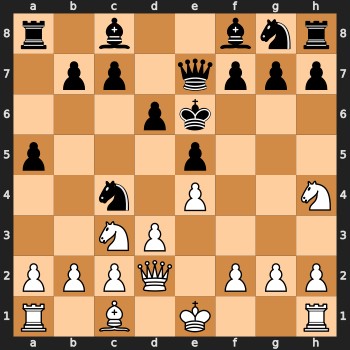

'True'

KeyboardInterrupt: 

In [59]:
import chess.svg
import cProfile
import pstats

SCENARIO_1 = '4k3/4P3/3PK3/8/8/8/8/8 w - - 0 1'
SCENARIO_2 = '8/3k4/8/8/8/3K4/3R4/3R4 w - - 0 1'
SCENARIO_3 = 'r1bqk1nr/ppp1bppp/3p4/n3p3/2B1P3/2NP1N2/PPP2PPP/R1BQK2R w KQkq - 1 6'

agent = AlphaBetaAgent()
board = chess.Board(SCENARIO_3)

time_to_move = list()

with cProfile.Profile() as pr:
    while not board.is_game_over():
        clear_output(wait=True)
        display(chess.svg.board(board, size=350))
        display(f'{board.turn}')
        if board.turn:
            start = time.perf_counter()
            action = agent.alpha_beta_search(board.copy(stack=False), 2)
            time_to_move.append(time.perf_counter() - start)
        else:
            action = random.choice(list(board.legal_moves))
        board.push(action)

display(chess.svg.board(board, size=350))
board.outcome()

In [55]:
time_to_move

[0.15540261800015287,
 0.28108697299921914,
 3.794657210999503,
 2.5743649779997213,
 1.709605222999926,
 1.9817065290008031,
 1.1909545460002846,
 1.1764294869999503,
 1.2092075150003438,
 8.613514157000282,
 7.049445849999756,
 12.561719731999801,
 13.520098212999983,
 16.28828670999974,
 19.072235008999996,
 13.819829338999625,
 3.5421741210002438,
 6.127133834999768,
 10.304475315999298,
 16.29734781300067]

In [60]:
stats = pstats.Stats(pr)
stats.sort_stats(pstats.SortKey.TIME)
stats.print_stats()

         124352458 function calls (123991898 primitive calls) in 74.251 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6908069    8.583    0.000   20.613    0.000 /home/englishlayup/anaconda3/lib/python3.8/site-packages/chess/__init__.py:1650(generate_pseudo_legal_moves)
  6776558    5.256    0.000   12.014    0.000 /home/englishlayup/anaconda3/lib/python3.8/site-packages/chess/__init__.py:3450(_is_safe)
  6366937    5.138    0.000    6.501    0.000 /home/englishlayup/anaconda3/lib/python3.8/site-packages/chess/__init__.py:3106(is_capture)
 14323668    4.979    0.000    5.918    0.000 /home/englishlayup/anaconda3/lib/python3.8/site-packages/chess/__init__.py:278(scan_reversed)
  6675452    4.239    0.000   39.000    0.000 /home/englishlayup/anaconda3/lib/python3.8/site-packages/chess/__init__.py:3488(generate_legal_moves)
   241660    3.590    0.000   48.635    0.000 <ipython-input-39-9f6c27c949ed>:69(<listcomp>)
  15539